## Rules of this Notebook:
### <span style = 'color:red'> Note: Read this time and again, as and when you feel like you have forgotten the rules</span> 

Note alse that this notebook has the three datasets `swipesmonth1719`, `years` and `bio`.

* Filter and join only using SQL commands (never Python), except when experimenting:

    1) Use `swipesmonth1719` and `years` tables ONLY for SQL queries
    
* Use python for anything else, but you may also use SQL for any other functionality

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [69]:
swipesmonth1719 = pd.read_csv(r'C:\Users\BILLIONAIRE\Documents\2019-MASTERS\MAIN\EDUCATION\DATA\WORKING\swipesmonth1719.csv')

In [70]:
years = pd.read_csv('C:/Users/BILLIONAIRE/Documents/2019-MASTERS/MAIN/EDUCATION/DATA/WORKING/years.csv')

In [71]:
bio = pd.read_csv(r'C:\Users\BILLIONAIRE\Documents\2019-MASTERS\MAIN\EDUCATION\DATA\WORKING\bio.csv')

### Pandas Profiling bio

In [61]:
import pandas_profiling

In [ ]:
pf_bio = pandas_profiling.ProfileReport(bio)

In [57]:
pf_bio.to_file(output_file="bio.html")

### Pandas Profiling swipesmonth1719

In [59]:
pf_swipesmonth1719 = pandas_profiling.ProfileReport(swipesmonth1719)

In [60]:
pf_swipesmonth1719.to_file(output_file="swipesMonth1719.html")

### Pandas Profiling years

In [62]:
pf_years = pandas_profiling.ProfileReport(years)

In [63]:
pf_years.to_file(output_file="years.html")

## SQL Imports

In [21]:
from pandasql import sqldf
from pandasql import load_meat, load_births
from pandasql import *
pysqldf = lambda q: sqldf(q, globals())
pd.set_option('display.max_columns', 500)

In [41]:
def filterSwipe(facility_type, year_icam):
    return pysqldf(
        '''
        select 
            swipesmonth1719.user_id, swipesmonth1719.month_icam, swipesmonth1719.duration_minutes, 
            swipesmonth1719.no_of_days, bio.residence_description  
        from swipesmonth1719
        left join bio on swipesmonth1719.user_id = bio.student_number
        where 
            swipesmonth1719.facility_type = 'Lib'
            and swipesmonth1719.year_icam = '2017'
            and bio.calendar_inst_year = '2017'
        '''.format(facility_type, year_icam)
       )

In [42]:
swipesmonthLib17 = filterSwipe('Lib', 2017)

### Parse to numeric for `duration_minutes` and `unit_latest_mark`

In [43]:
swipesmonthLib17['duration_minutes'] = swipesmonthLib17['duration_minutes'].str.replace(',', '.', regex = False)
swipesmonthLib17['duration_minutes'] = pd.to_numeric(swipesmonthLib17['duration_minutes'])

In [72]:
swipesmonthLib17 = swipesmonthLib17.fillna(0)

In [73]:
a = swipesmonthLib17[swipesmonthLib17['residence_description'] != 'Not In Residence']

In [74]:
a.head()

,user_id,month_icam,duration_minutes,no_of_days,residence_description
29,968158,3,405.77,3,NOSWAL HALL
30,968158,4,269.00,5,NOSWAL HALL
31,968158,5,2502.63,10,NOSWAL HALL
32,968158,6,3.08,1,NOSWAL HALL
33,968158,7,870.75,4,NOSWAL HALL


In [53]:
import plotly.express as px
fig = px.line(data_frame = a.head(), x="month_icam", y="duration_minutes", color="residence_description", 
            line_group=None, hover_name='user_id',
            line_shape="spline", render_mode="svg")
fig.show()

In [156]:
def pivotDurationUnit():
    userIds = swipesmonthLab1702years['user_id'].unique() 
    
    unitTitles =  swipesmonthLab1702years['unit_title'].unique()    
    cols =[]
    for i in userIds:
        user = swipesmonthLab1702years[swipesmonthLab1702years['user_id'] == i]
        subjectMark = user.loc[:,['unit_title','unit_latest_mark']].values
        residence = user['residence_code'].unique()[0]
        subjectMark = np.insert(subjectMark, 0,['Residence',residence], axis = 0)
        duration = user['duration_minutes'].unique().sum()
        subjectMark = np.insert(subjectMark, 0,['Duration',duration], axis = 0)
        # insert user ids 
        subjectMark = np.insert(subjectMark, 0,['user_id',i], axis = 0)

        subjectMark = dict(subjectMark)
        
        cols.append(subjectMark)
        
    return userIds, unitTitles, cols 
    

In [157]:
swipesmonthLab1702yearsMath3 = pivotDurationUnit()

In [158]:
swipesmonthLab1702yearsMath3[2]

[{'user_id': '870702',
  'Duration': 7282.379999999999,
  'Residence': 'JCT',
  'Group Theory III': 45.0,
  'Leontief Systems III': 61.0},
 {'user_id': '795009',
  'Duration': 1188.6,
  'Residence': 'Not In Residence',
  'Number Theory III': 55.0,
  'Coding and Cryptography III': 72.0,
  'Complex Analysis III': 60.0,
  'Group Theory III': 46.0,
  'Real Analysis III': 26.0,
  'Leontief Systems III': 50.0},
 {'user_id': '1425583',
  'Duration': 5733.33,
  'Residence': 'Not In Residence',
  'Number Theory III': 78.0,
  'Coding and Cryptography III': 63.0,
  'Leontief Systems III': 60.0},
 {'user_id': '835527',
  'Duration': 2429.2799999999997,
  'Residence': 'REN',
  'Number Theory III': 61.0,
  'Coding and Cryptography III': 76.0,
  'Complex Analysis III': 80.0,
  'Group Theory III': 61.0,
  'Real Analysis III': 44.0,
  'Leontief Systems III': 65.0},
 {'user_id': '1126582',
  'Duration': 18092.29,
  'Residence': 'REI',
  'Number Theory III': 78.0,
  'Coding and Cryptography III': 80.0,
 

In [159]:
a = pd.DataFrame(index = swipesmonthLab1702yearsMath3[0], data = swipesmonthLab1702yearsMath3[2])

In [160]:
a = a.drop('user_id', axis = 1)

In [161]:
# from plotly import graph_objs as go
# import plotly.offline as py


# labels = ['APARTMENT ONLY', 'ENTIRE BUILDING']
# values = [787, 537]


# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
# py.iplot(fig)

In [162]:
a['Residence']

870702                  JCT
795009     Not In Residence
1425583    Not In Residence
835527                  REN
1126582                 REI
                 ...       
908936                  YVL
886156                  BAR
915702     Not In Residence
895253                  REN
704529     Not In Residence
Name: Residence, Length: 141, dtype: object

In [64]:
import plotly.express as px
wind = px.data.wind()
fig = px.bar_polar(wind, r="frequency", theta="direction", color="strength", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [67]:
wind

,direction,strength,frequency
0,N,0-1,0.50
1,NNE,0-1,0.60
2,NE,0-1,0.50
3,ENE,0-1,0.40
4,E,0-1,0.40
5,ESE,0-1,0.30
6,SE,0-1,0.40
7,SSE,0-1,0.40
8,S,0-1,0.60
9,SSW,0-1,0.40


### Scale and fill NaN's with 0's cause that's most intuitive - NaN indicates 0 number of minutes or days

In [90]:
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
X = skp.StandardScaler().fit_transform(swipesmonth1702)

X = np.nan_to_num(X, copy = True)

## Kmeans

In [91]:
from sklearn.cluster import KMeans
from sklearn import cluster
n_clusters = 5
np.random.seed(97)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
# The original X will still have the nan
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Remember, `swipesmonth1702` is not scaled

In [92]:
XLabels = k_means.labels_
swipesmonth1702['kMeansLabels'] = XLabels

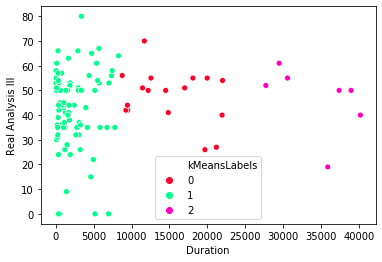

In [102]:
sns.scatterplot(data = swipesmonth1702, x = 'duration_minutes', y = 'no_of_days', hue = 'kMeansLabels', palette = 'gist_rainbow')

## Kmeans for duration only

In [103]:
from sklearn.cluster import KMeans
from sklearn import cluster
n_clusters = 3
np.random.seed(97)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
# The original X will still have the nan
X1 = np.array(a['Duration']).reshape(-1,1)
k_means.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
X1Labels = k_means.labels_
a['kMeansLabels'] = X1Labels

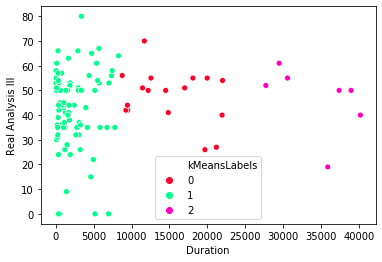

In [105]:
sns.scatterplot(data = a, x = 'Duration', y = 'Real Analysis III', hue = 'kMeansLabels', palette = 'gist_rainbow')

### Scatterplot for marks vs duration coloured by residence

In [164]:
a

,Duration,Residence,Group Theory III,Leontief Systems III,Number Theory III,Coding and Cryptography III,Complex Analysis III,Real Analysis III,Rings and Fields III,Differential Geometry III,Topology III
870702,7282.38,JCT,45.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795009,1188.60,Not In Residence,46.0,50.0,55.0,72.0,60.0,26.0,NaN,NaN,NaN
1425583,5733.33,Not In Residence,NaN,60.0,78.0,63.0,NaN,NaN,NaN,NaN,NaN
835527,2429.28,REN,61.0,65.0,61.0,76.0,80.0,44.0,NaN,NaN,NaN
1126582,18092.29,REI,78.0,70.0,78.0,80.0,80.0,55.0,NaN,NaN,NaN
805616,1259.59,JCT,67.0,NaN,53.0,NaN,41.0,41.0,33.0,23.0,NaN
1084380,14839.63,Not In Residence,76.0,75.0,64.0,80.0,80.0,41.0,NaN,NaN,NaN
1174093,4128.33,BAR,53.0,54.0,NaN,61.0,66.0,NaN,NaN,NaN,NaN
867062,30574.08,REN,72.0,64.0,61.0,72.0,73.0,55.0,45.0,NaN,NaN
1038238,999.15,Not In Residence,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN


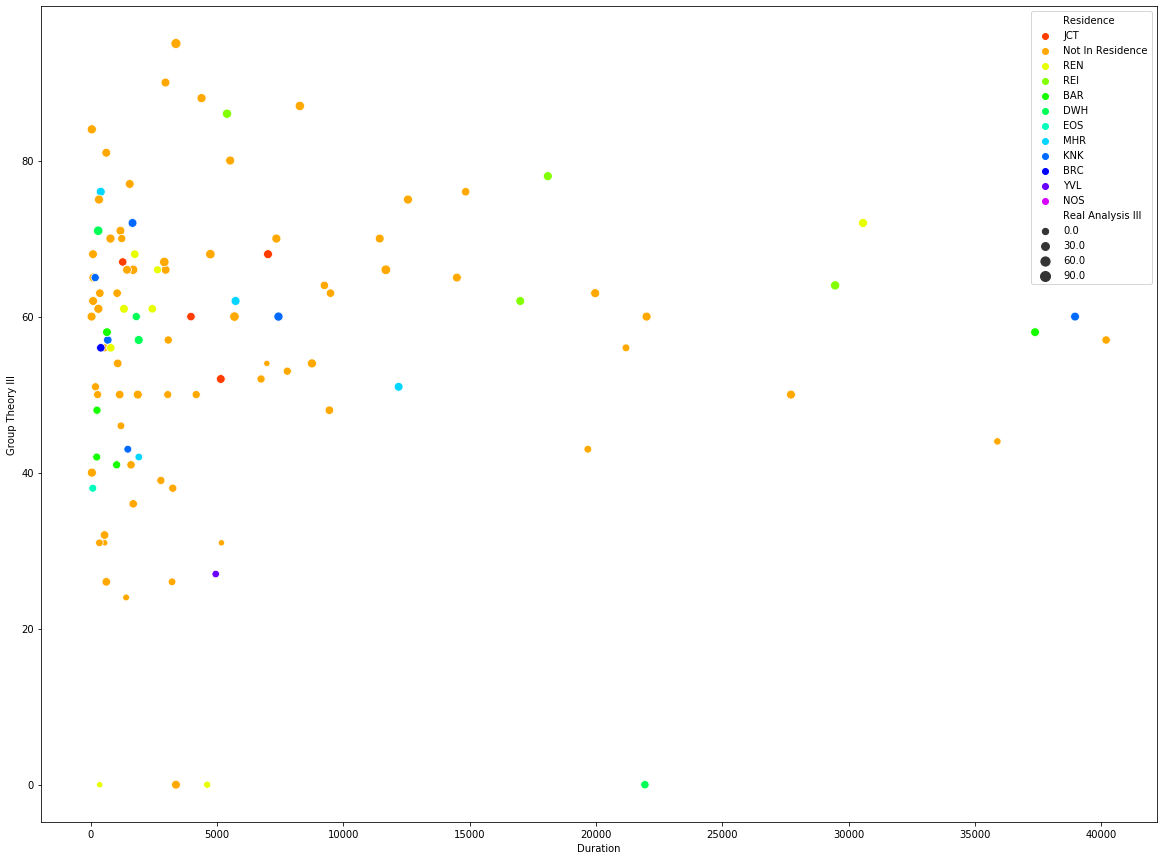

In [176]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = a, x = 'Duration', y = 'Group Theory III', size = 'Real Analysis III', sizes = (40,100), hue = 'Residence', hue_order = None, palette='gist_rainbow')